# Convolutional Neural Netowrks 

Data contain the train, test and validation datasets

## 1. Import libraries and setting up device-agnostic code

In [1]:
import torch 
from torch import nn 

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 2. Data preparation and data exploration

In [2]:
from pathlib import Path
import splitfolders

data_path = Path("./data/")
input_folder = data_path / "CT-KIDNEY-DATASET"
output_folder = data_path / "CT-KIDNEY-VAL"
# splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .1, .1))

In [3]:
from helperfunctions import walk_through_dir 
image_path = data_path / "CT-KIDNEY-VAL"
walk_through_dir(image_path)

There are 3 directories and 0 images in data\CT-KIDNEY-VAL
There are 4 directories and 0 images in data\CT-KIDNEY-VAL\test
There are 0 directories and 372 images in data\CT-KIDNEY-VAL\test\Cyst
There are 0 directories and 509 images in data\CT-KIDNEY-VAL\test\Normal
There are 0 directories and 139 images in data\CT-KIDNEY-VAL\test\Stone
There are 0 directories and 229 images in data\CT-KIDNEY-VAL\test\Tumor
There are 4 directories and 0 images in data\CT-KIDNEY-VAL\train
There are 0 directories and 2967 images in data\CT-KIDNEY-VAL\train\Cyst
There are 0 directories and 4061 images in data\CT-KIDNEY-VAL\train\Normal
There are 0 directories and 1101 images in data\CT-KIDNEY-VAL\train\Stone
There are 0 directories and 1826 images in data\CT-KIDNEY-VAL\train\Tumor
There are 4 directories and 0 images in data\CT-KIDNEY-VAL\val
There are 0 directories and 370 images in data\CT-KIDNEY-VAL\val\Cyst
There are 0 directories and 507 images in data\CT-KIDNEY-VAL\val\Normal
There are 0 directories

In [4]:
# Setup train and testing paths 
train_dir = image_path / "train"
test_dir = image_path / "test"
val_dir = image_path / "val"

train_dir, test_dir, val_dir

(WindowsPath('data/CT-KIDNEY-VAL/train'),
 WindowsPath('data/CT-KIDNEY-VAL/test'),
 WindowsPath('data/CT-KIDNEY-VAL/val'))

### 2.1 Visualizing the image

data\CT-KIDNEY-VAL\train\Normal\Normal- (4495).jpg
Normal
Random image path: data\CT-KIDNEY-VAL\train\Normal\Normal- (4495).jpg
Image class: Normal
Image height: 658
Image width: 813


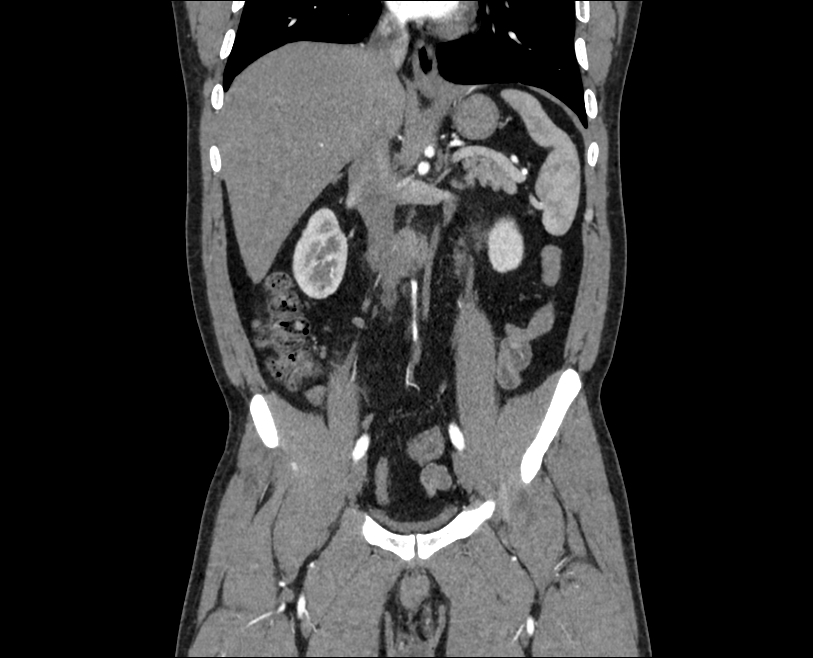

In [5]:
import random 
from PIL import Image 

# Set seed 
# random.seed(42)
# 1. Get all image paths 
image_path_list = list(image_path.glob("*/*/*.jpg"))
# 2. Pick a random image 
random_image_path = random.choice(image_path_list)
print(random_image_path)
# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
print(image_class)
# 4. open the image 
img = Image.open(random_image_path)
# 5. Print metadata 
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 812.5, 657.5, -0.5)

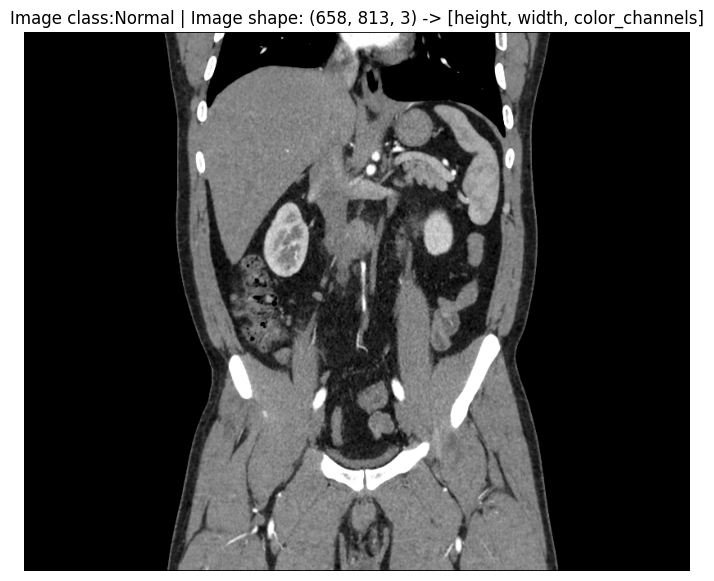

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
# Turn the image in an arrage 
img_as_array = np.asarray(img)
# Plot the image 
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class:{image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)

## 3. Transforming data

In [7]:
import torch 
from torch.utils.data import DataLoader 
from torchvision import transforms


transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
])

## 4. Image Folders and Data Loaders

In [8]:
from torchvision import datasets 

# Turn image folders into Datasets
train_data = datasets.ImageFolder(root= train_dir, 
                                transform= transform)
test_data = datasets.ImageFolder(root=test_dir, 
                                transform=transform)
val_data = datasets.ImageFolder(root=val_dir, 
                                transform=transform)
train_data, test_data, val_data

(Dataset ImageFolder
     Number of datapoints: 9955
     Root location: data\CT-KIDNEY-VAL\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
            ),
 Dataset ImageFolder
     Number of datapoints: 1249
     Root location: data\CT-KIDNEY-VAL\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
            ),
 Dataset ImageFolder
     Number of datapoints: 1242
     Root location: data\CT-KIDNEY-VAL\val
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normalize(mean=(0.5, 0.5, 0.5), s

In [9]:
# Get class names as  list 
class_names = train_data.classes
class_names

['Cyst', 'Normal', 'Stone', 'Tumor']

In [10]:
# Get class names a dictionary 
class_dict = train_data.class_to_idx
class_dict

{'Cyst': 0, 'Normal': 1, 'Stone': 2, 'Tumor': 3}

In [11]:
# Check length of our dataset 
len(train_data), len(test_data), len(val_data)

(9955, 1249, 1242)

In [12]:
# Index on train_data Dataset to get a sample image and label 
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image label: {label}")
print(f"Image datatype: {img.dtype}")

Image tensor:
 tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]])
Image shape: torch.Size([3, 64, 64])
Image label: 0
Image datatype: torch.float32


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'Cyst')

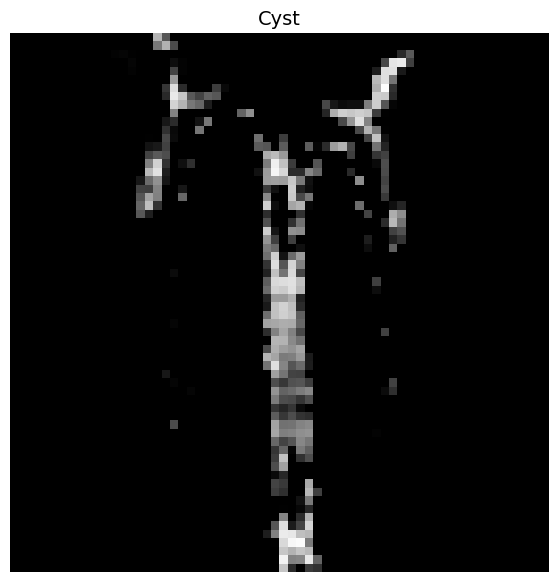

In [13]:
# Rearrange the order dimension 
img_permute = img.permute(1,2,0)
# Print out different shapes
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")
# Plot the image 
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

In [13]:
import os 
os.cpu_count()

32

In [15]:
from torch.utils.data import DataLoader

BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)
val_dataloader = DataLoader(dataset=val_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)
train_dataloader, test_dataloader, val_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x200f194eea0>,
 <torch.utils.data.dataloader.DataLoader at 0x200f3b93800>)

## 5. Model

In [16]:
class CNNModel0(nn.Module):
    def __init__(self, 
                 input_shape:int,
                 hidden_units:int, 
                 output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, 
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, 
                         stride=2) 
        )
        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, 
                        stride=2) 
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*8*8, out_features=output_shape)
        )
    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.conv_block_3(x)
        x = self.classifier(x)
        return x

In [17]:
# Forward pass on a singel image
image_batch, label_batch = next(iter(train_dataloader))
image_batch.shape, label_batch.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [18]:
# Set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Recreate an instance of CNNModel 
model_0 = CNNModel0(input_shape=3, 
                  hidden_units=40, 
                  output_shape=len(train_data.classes)).to(device)

# Try a forward pass
model_0(image_batch.to(device))

tensor([[-0.0043,  0.0118,  0.0213,  0.0093]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [19]:
from torchinfo import summary
summary(model_0, input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
CNNModel0                                [1, 4]                    --
├─Sequential: 1-1                        [1, 40, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 40, 64, 64]           1,120
│    └─ReLU: 2-2                         [1, 40, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 40, 64, 64]           14,440
│    └─ReLU: 2-4                         [1, 40, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 40, 32, 32]           --
├─Sequential: 1-2                        [1, 40, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 40, 32, 32]           14,440
│    └─ReLU: 2-7                         [1, 40, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 40, 32, 32]           14,440
│    └─ReLU: 2-9                         [1, 40, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 40, 16, 16]           --


## 6. Loss Function and Optimizer 

In [20]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                             lr=0.01,  
                             momentum=0.9)

## 7. Train model

In [21]:
from tqdm.auto import tqdm 

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0_results = {"train_loss": [],
                "train_acc": [],
                "val_loss": [],
                "val_acc": []}
EPOCHS = 5
# Start the time 
from timeit import default_timer as timer
start_timer = timer()

### Model training begins 
for epoch in tqdm(range(EPOCHS)):
    ## Training Loop
    model_0.train() 
    train_loss, train_acc = 0, 0 
    for batch, (X,y) in enumerate(train_dataloader):
        X,y = X.to(device), y.to(device)
        y_pred = model_0(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 
        optimizer.zero_grad() 
        loss.backward() 
        optimizer.step() 
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class==y).sum().item()/len(y_pred)
    train_loss = train_loss / len(train_dataloader)
    train_acc = train_acc / len(train_dataloader)
    model_0_results["train_loss"].append(train_loss)
    model_0_results["train_acc"].append(train_acc)
    ## Validation loop
    model_0.eval() 
    val_loss, val_acc = 0, 0
    with torch.inference_mode():
        for batch, (X,y) in enumerate(val_dataloader):
            X, y = X.to(device), y.to(device)
            val_pred_logits = model_0(X)
            loss = loss_fn(val_pred_logits, y)
            val_loss += loss.item()
            val_pred_labels = val_pred_logits.argmax(dim=1)
            val_acc += ((val_pred_labels == y).sum().item()/len(val_pred_labels))
    val_loss = val_loss / len(val_dataloader)
    val_acc = val_acc / len(val_dataloader)
    model_0_results["val_loss"].append(val_loss)
    model_0_results["val_acc"].append(val_acc)
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} , Train acc: {train_acc:.4f} | Validation loss: {val_loss:.4f}, Validation acc: {val_acc:.4f}")
end_timer = timer()
print(f"Total training timer: {end_timer-start_timer:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\Thoyajaksha Kashyap\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 0 | Train loss: 1.2968 , Train acc: 0.3918 | Validation loss: 1.3076, Validation acc: 0.4082
Epoch: 1 | Train loss: 1.2983 , Train acc: 0.3914 | Validation loss: 1.3161, Validation acc: 0.4082
Epoch: 2 | Train loss: 1.3005 , Train acc: 0.3871 | Validation loss: 1.2822, Validation acc: 0.4082
Epoch: 3 | Train loss: 1.2976 , Train acc: 0.3911 | Validation loss: 1.2825, Validation acc: 0.4082
Epoch: 4 | Train loss: 1.2979 , Train acc: 0.3910 | Validation loss: 1.2970, Validation acc: 0.4082
Total training timer: 628.609 seconds


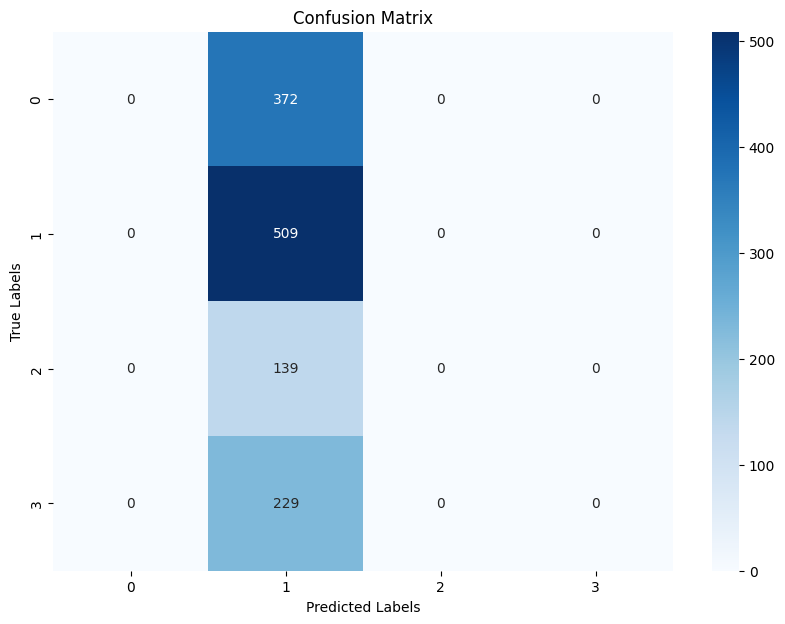

In [22]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns

all_preds = []
all_labels = []

model_0.eval() 
with torch.inference_mode():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_0(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [28]:
from typing import Tuple, Dict, List

def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of rsults dictionary"""
    # Get the loss values of results dictionary (training and test)
    loss = results["train_loss"]
    val_loss = results["val_loss"]
    # Get the accuracy values of the results dictionary (training and val)
    accuracy = results["train_acc"]
    val_accuracy = results["val_acc"]
    # Figure out number of epochs 
    epochs = range(len(results["train_loss"]))
    # Setup a plot 
    plt.figure(figsize=(15,7))
    # Plot the loss 
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot the accuracy 
    plt.subplot(1,2,2)
    plt.plot(epochs, accuracy, label="train_acc")
    plt.plot(epochs, val_accuracy, label="val_acc")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend();

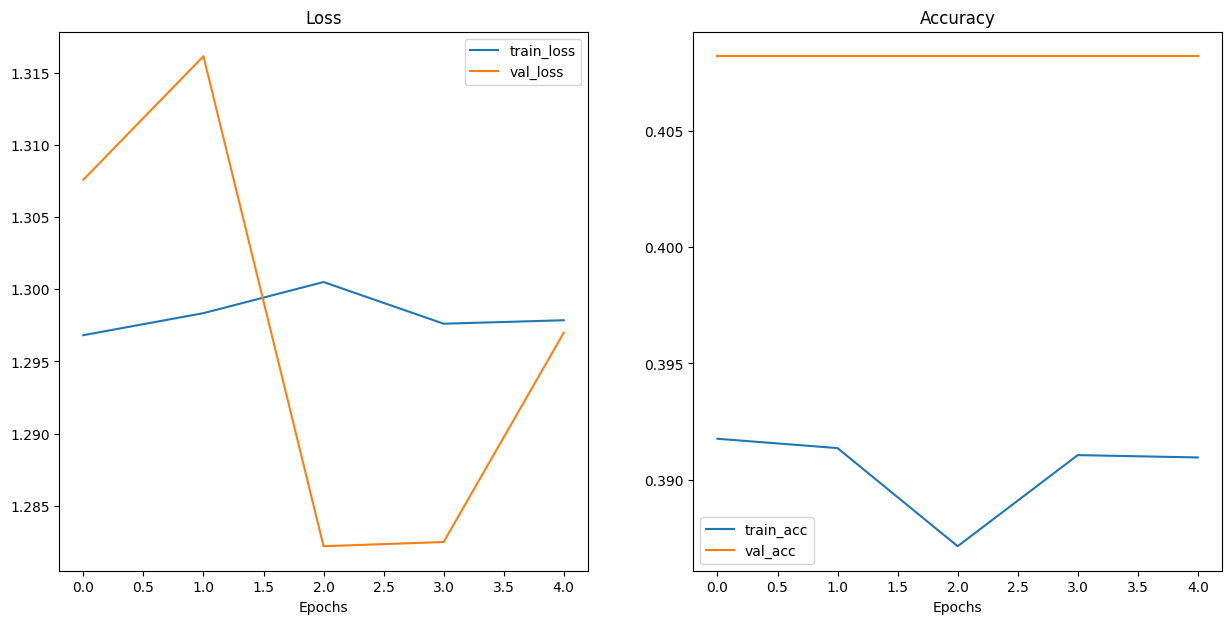

In [24]:
plot_loss_curves(model_0_results)

In [36]:
class CNNModel1(nn.Module):
    def __init__(self, 
                 input_shape:int,
                 hidden_units:int, 
                 output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, padding=0, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, 
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=0, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, 
                         stride=2) 
        )
        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=0, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, 
                        stride=2) 
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*4*4, out_features=output_shape)
        )
    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.conv_block_3(x)
        # print(x.shape)
        x = self.classifier(x)
        return x

In [37]:
# Set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Recreate an instance of CNNModel 
model_1 = CNNModel1(input_shape=3, 
                  hidden_units=40, 
                  output_shape=len(train_data.classes)).to(device)

# Try a forward pass
model_1(image_batch.to(device))

tensor([[ 0.0226, -0.0470,  0.0175,  0.0242]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [38]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), 
                              lr=1e-3,
                             betas=(0.9,0.999),
                             weight_decay=0.1)

In [39]:
from tqdm.auto import tqdm 

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1_results = {"train_loss": [],
                "train_acc": [],
                "val_loss": [],
                "val_acc": []}
EPOCHS = 10
# Start the time 
from timeit import default_timer as timer
start_timer = timer()

### Model training begins 
for epoch in tqdm(range(EPOCHS)):
    ## Training Loop
    model_1.train() 
    train_loss, train_acc = 0, 0 
    for batch, (X,y) in enumerate(train_dataloader):
        X,y = X.to(device), y.to(device)
        y_pred = model_1(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 
        optimizer.zero_grad() 
        loss.backward() 
        optimizer.step() 
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class==y).sum().item()/len(y_pred)
    train_loss = train_loss / len(train_dataloader)
    train_acc = train_acc / len(train_dataloader)
    model_1_results["train_loss"].append(train_loss)
    model_1_results["train_acc"].append(train_acc)
    ## Validation loop
    model_1.eval() 
    val_loss, val_acc = 0, 0
    with torch.inference_mode():
        for batch, (X,y) in enumerate(val_dataloader):
            X, y = X.to(device), y.to(device)
            val_pred_logits = model_1(X)
            loss = loss_fn(val_pred_logits, y)
            val_loss += loss.item()
            val_pred_labels = val_pred_logits.argmax(dim=1)
            val_acc += ((val_pred_labels == y).sum().item()/len(val_pred_labels))
    val_loss = val_loss / len(val_dataloader)
    val_acc = val_acc / len(val_dataloader)
    model_1_results["val_loss"].append(val_loss)
    model_1_results["val_acc"].append(val_acc)
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} , Train acc: {train_acc:.4f} | Validation loss: {val_loss:.4f}, Validation acc: {val_acc:.4f}")
end_timer = timer()
print(f"Total training timer: {end_timer-start_timer:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.2895 , Train acc: 0.4015 | Validation loss: 1.2966, Validation acc: 0.4082
Epoch: 1 | Train loss: 1.2879 , Train acc: 0.4070 | Validation loss: 1.2813, Validation acc: 0.4082
Epoch: 2 | Train loss: 1.2873 , Train acc: 0.4079 | Validation loss: 1.2833, Validation acc: 0.4082
Epoch: 3 | Train loss: 1.2866 , Train acc: 0.4079 | Validation loss: 1.2851, Validation acc: 0.4082
Epoch: 4 | Train loss: 1.2864 , Train acc: 0.4079 | Validation loss: 1.2857, Validation acc: 0.4082
Epoch: 5 | Train loss: 1.2863 , Train acc: 0.4065 | Validation loss: 1.2856, Validation acc: 0.4082
Epoch: 6 | Train loss: 1.2887 , Train acc: 0.4073 | Validation loss: 1.2873, Validation acc: 0.4082
Epoch: 7 | Train loss: 1.2870 , Train acc: 0.4071 | Validation loss: 1.2868, Validation acc: 0.4082
Epoch: 8 | Train loss: 1.2876 , Train acc: 0.4074 | Validation loss: 1.2928, Validation acc: 0.4082
Epoch: 9 | Train loss: 1.2861 , Train acc: 0.4068 | Validation loss: 1.2848, Validation acc: 0.4082


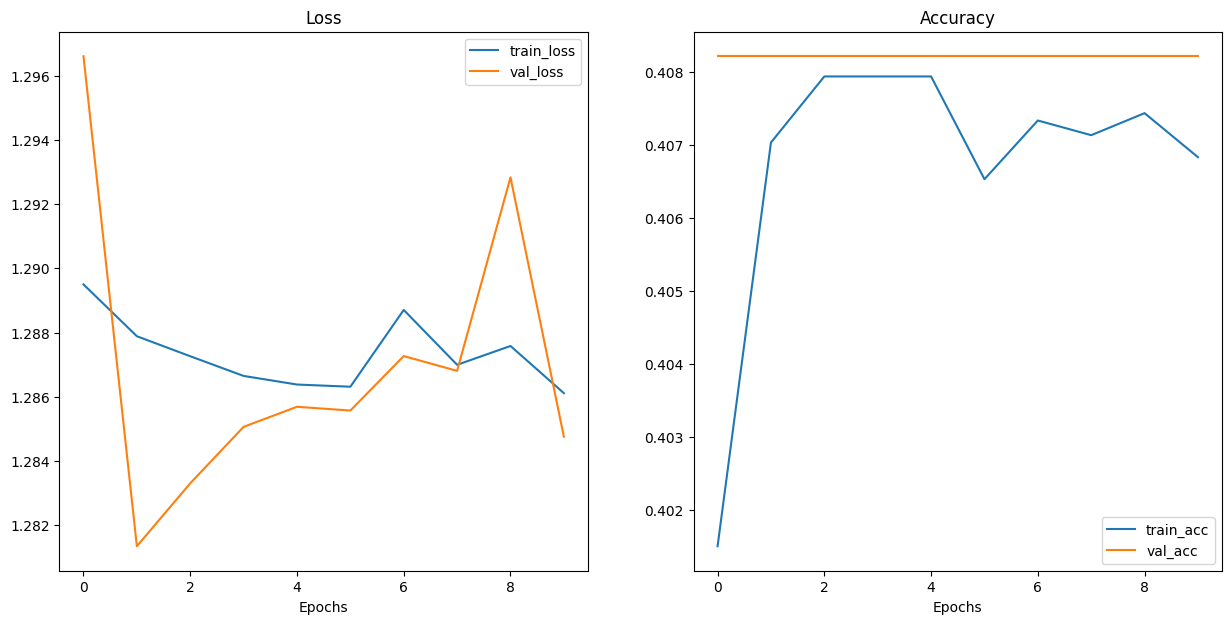

In [40]:
plot_loss_curves(model_1_results)

In [52]:
import torch.nn.functional as F 

class CNNModel2(nn.Module):
    def __init__(self, 
                 input_shape:int,
                 hidden_units:int, 
                 output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, padding=0, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, 
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=0, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, 
                         stride=2) 
        )
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features=hidden_units*13*13, out_features=hidden_units)
        self.fc2 = nn.Linear(in_features=hidden_units, out_features=output_shape)
    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

In [53]:
# Set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Recreate an instance of CNNModel 
model_2 = CNNModel2(input_shape=3, 
                  hidden_units=20, 
                  output_shape=len(train_data.classes)).to(device)

# Try a forward pass
model_2(image_batch.to(device))

tensor([[ 0.2048,  0.0910, -0.0564, -0.0271]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [54]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(), 
                              lr=1e-3)

In [55]:
from tqdm.auto import tqdm 

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_2_results = {"train_loss": [],
                "train_acc": [],
                "val_loss": [],
                "val_acc": []}
EPOCHS = 10
# Start the time 
from timeit import default_timer as timer
start_timer = timer()

### Model training begins 
for epoch in tqdm(range(EPOCHS)):
    ## Training Loop
    model_2.train()  
    train_loss, train_acc = 0, 0 
    for batch, (X,y) in enumerate(train_dataloader):
        X,y = X.to(device), y.to(device)
        y_pred = model_2(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 
        optimizer.zero_grad() 
        loss.backward() 
        optimizer.step() 
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class==y).sum().item()/len(y_pred)
    train_loss = train_loss / len(train_dataloader)
    train_acc = train_acc / len(train_dataloader)
    model_2_results["train_loss"].append(train_loss)
    model_2_results["train_acc"].append(train_acc)
    ## Validation loop
    model_2.eval() 
    val_loss, val_acc = 0, 0
    with torch.inference_mode():
        for batch, (X,y) in enumerate(val_dataloader):
            X, y = X.to(device), y.to(device)
            val_pred_logits = model_2(X)
            loss = loss_fn(val_pred_logits, y)
            val_loss += loss.item()
            val_pred_labels = val_pred_logits.argmax(dim=1)
            val_acc += ((val_pred_labels == y).sum().item()/len(val_pred_labels))
    val_loss = val_loss / len(val_dataloader)
    val_acc = val_acc / len(val_dataloader)
    model_2_results["val_loss"].append(val_loss)
    model_2_results["val_acc"].append(val_acc)
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} , Train acc: {train_acc:.4f} | Validation loss: {val_loss:.4f}, Validation acc: {val_acc:.4f}")
end_timer = timer()
print(f"Total training timer: {end_timer-start_timer:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.8331 , Train acc: 0.6515 | Validation loss: 0.5293, Validation acc: 0.7794
Epoch: 1 | Train loss: 0.5218 , Train acc: 0.7637 | Validation loss: 0.1714, Validation acc: 0.9380
Epoch: 2 | Train loss: 0.3785 , Train acc: 0.8203 | Validation loss: 0.1216, Validation acc: 0.9630
Epoch: 3 | Train loss: 0.3380 , Train acc: 0.8492 | Validation loss: 0.0612, Validation acc: 0.9919
Epoch: 4 | Train loss: 0.3081 , Train acc: 0.8673 | Validation loss: 0.1141, Validation acc: 0.9646
Epoch: 5 | Train loss: 0.2974 , Train acc: 0.8750 | Validation loss: 0.0581, Validation acc: 0.9847
Epoch: 6 | Train loss: 0.2762 , Train acc: 0.8788 | Validation loss: 0.0895, Validation acc: 0.9710
Epoch: 7 | Train loss: 0.2614 , Train acc: 0.8924 | Validation loss: 0.0540, Validation acc: 0.9791
Epoch: 8 | Train loss: 0.2563 , Train acc: 0.8900 | Validation loss: 0.0399, Validation acc: 0.9863
Epoch: 9 | Train loss: 0.2497 , Train acc: 0.8991 | Validation loss: 0.0424, Validation acc: 0.9807


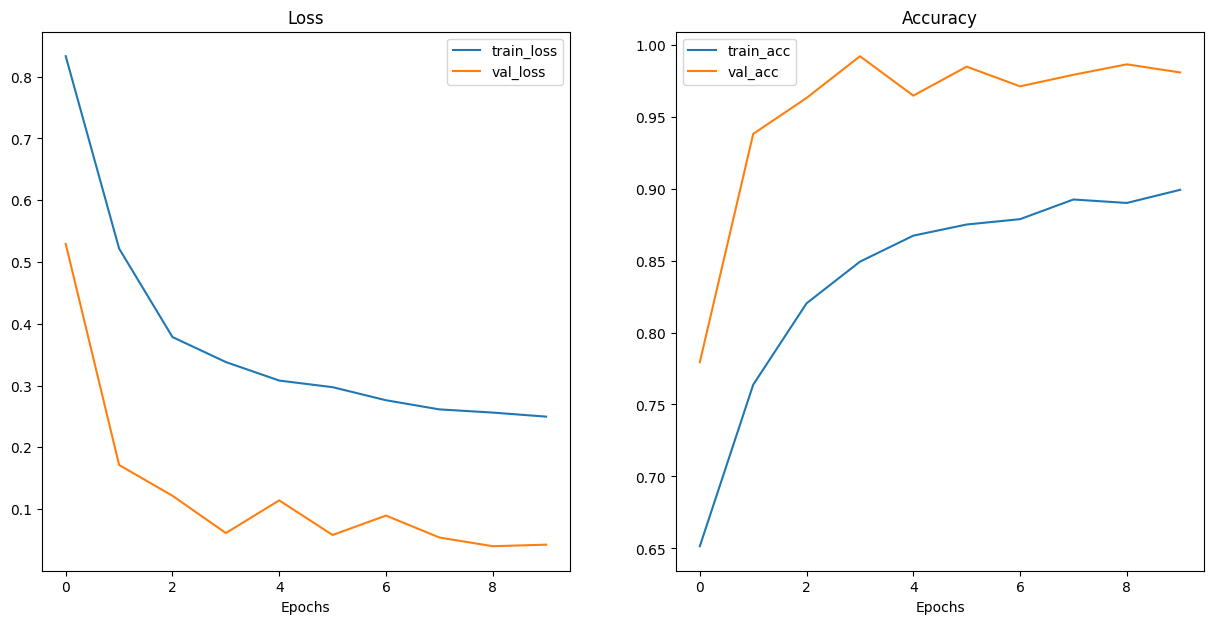

In [56]:
plot_loss_curves(model_2_results)

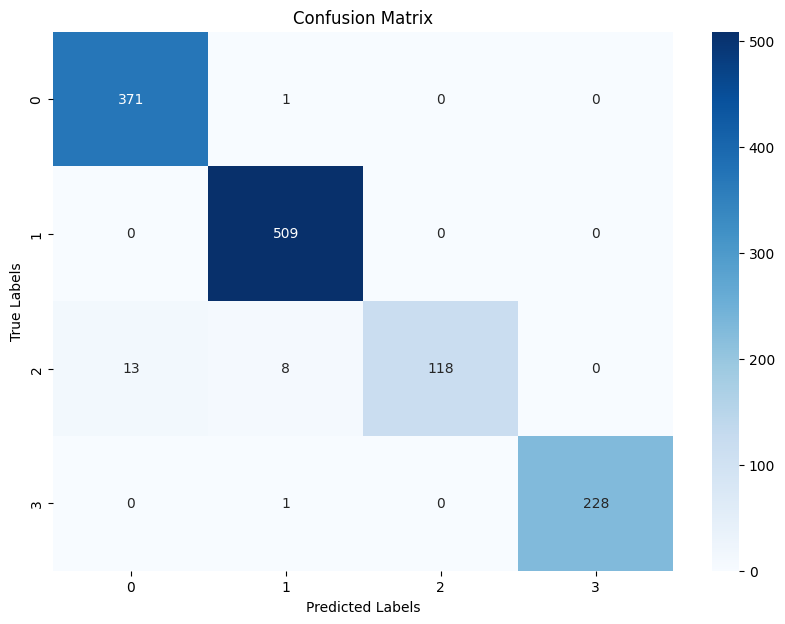

In [58]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns

all_preds = []
all_labels = []

model_2.eval() 
with torch.inference_mode():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_2(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [60]:
# Testing loop
model_0.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_0(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 40.75%


In [61]:
# Testing loop
model_1.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_1(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')

torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 13, 13])
torch.Size([1, 20, 1

In [62]:
# Testing loop
model_2.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 98.16%


## Prediction on custom image

In [119]:
import torchvision 

custom_image_path = data_path / "Tumor.jpg"
custom_image_uint8 = torchvision.io.read_image(custom_image_path)
print(f" Custom image tensor: \n{custom_image_uint8}")
print(f" Custom image shape: {custom_image_uint8.shape}")
print(f" Custom image dtype: {custom_image_uint8.dtype}")

 Custom image tensor: 
tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)
 Custom image shape: torch.Size([3, 512, 512])
 Custom image dtype: torch.uint8


(-0.5, 511.5, 511.5, -0.5)

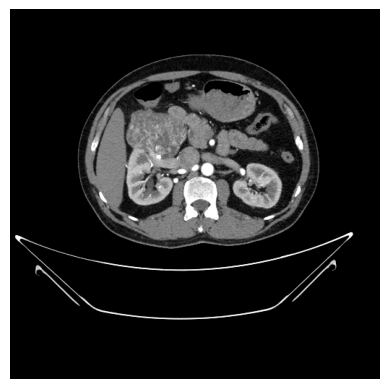

In [120]:
plt.imshow(custom_image_uint8.permute(1,2,0))
plt.axis("off")

In [121]:
# Load the custom image and covert to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255
custom_image

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [122]:
# Create trasnform pipeline to resize image 
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
])

# Transform target image 
custom_image_transformed = custom_image_transform(custom_image) 

# Print out shapes 
print(f"Original shape: {custom_image.shape}")
print(f"Transformed shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 512, 512])
Transformed shape: torch.Size([3, 64, 64])


(-0.5, 63.5, 63.5, -0.5)

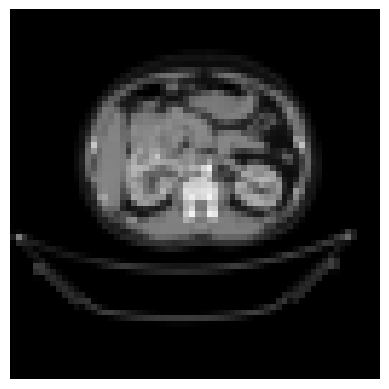

In [123]:
plt.imshow(custom_image_transformed.permute(1,2,0))
plt.axis("off")

In [124]:
model_2.eval()
with torch.inference_mode():
    custom_image_pred = model_2(custom_image_transformed.unsqueeze(0).to(device))
custom_image_pred

tensor([[-151.4901,   19.7687,  -51.1486,  -25.8309]], device='cuda:0')

In [125]:
# Convert logits -> prediction probabilities 
custom_img_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_img_pred_probs

tensor([[0.0000e+00, 1.0000e+00, 1.5887e-31, 1.5716e-20]], device='cuda:0')

In [126]:
# Conver prediction probabilities -> prediction labels
custom_img_pred_labels = torch.argmax(custom_img_pred_probs, dim=1).cpu()
custom_img_pred_labels

tensor([1])

In [127]:
class_names[custom_img_pred_labels] 

'Normal'

In [34]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform = None,
                        device=device):
    """Makes a prediction on a target image with trained model and plots the image and prediction."""
    # Load in the image 
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    # Divide the image pixel values by 255 to get them between [0,1]
    target_image = target_image / 255.
    # Transform if necessary
    if transform: 
        target_image = transform(target_image)
    # Make sure model is on the target device 
    model.to(device)
    # Turn on eval/inference mode and make prediction 
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(0)
        # Make the prediction on image with an extra dimension 
        target_image_pred = model(target_image.to(device))
    # Convert logits -> prediction probabilities
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
    # Conver prediction probabilities -> prediction labels 
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    # Plot the image alongside the prediction and prediction probability 
    plt.imshow(target_image.squeeze().permute(1,2,0)) # Remove batch and rearrange [h,w,c]
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu()}"
    plt.title(title)
    plt.axis("off")

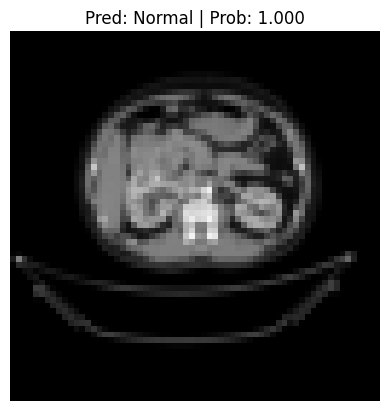

In [129]:
# Pred on our custom image
pred_and_plot_image(model=model_2,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

In [26]:
import torch.nn.functional as F 

class CNNModel3(nn.Module):
    def __init__(self, 
                 input_shape: int,
                 hidden_units: int, 
                 output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, padding=0, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=0, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=0, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(0.2)
        self.fc1 = nn.Linear(in_features=hidden_units * 4 * 4, out_features=hidden_units)  
        self.fc2 = nn.Linear(in_features=hidden_units, out_features=hidden_units)  
        self.fc3 = nn.Linear(in_features=hidden_units, out_features=output_shape)  

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.conv_block_3(x)
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [17]:
# Forward pass on a singel image
image_batch, label_batch = next(iter(train_dataloader))
image_batch.shape, label_batch.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [27]:
# Set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Recreate an instance of CNNModel 
model_3 = CNNModel3(input_shape=3, 
                  hidden_units=20, 
                  output_shape=len(train_data.classes)).to(device)

# Try a forward pass
model_3(image_batch.to(device))

tensor([[ 0.1740, -0.1562,  0.0913,  0.1078]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [30]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_3.parameters(), 
                              lr=1e-3)

In [31]:
from tqdm.auto import tqdm 

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_3_results = {"train_loss": [],
                "train_acc": [],
                "val_loss": [],
                "val_acc": []}
EPOCHS = 10
# Start the time 
from timeit import default_timer as timer
start_timer = timer()

### Model training begins 
for epoch in tqdm(range(EPOCHS)):
    ## Training Loop
    model_3.train()  
    train_loss, train_acc = 0, 0 
    for batch, (X,y) in enumerate(train_dataloader):
        X,y = X.to(device), y.to(device)
        y_pred = model_3(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 
        optimizer.zero_grad() 
        loss.backward() 
        optimizer.step() 
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class==y).sum().item()/len(y_pred)
    train_loss = train_loss / len(train_dataloader)
    train_acc = train_acc / len(train_dataloader)
    model_3_results["train_loss"].append(train_loss)
    model_3_results["train_acc"].append(train_acc)
    ## Validation loop
    model_3.eval() 
    val_loss, val_acc = 0, 0
    with torch.inference_mode():
        for batch, (X,y) in enumerate(val_dataloader):
            X, y = X.to(device), y.to(device)
            val_pred_logits = model_3(X)
            loss = loss_fn(val_pred_logits, y)
            val_loss += loss.item()
            val_pred_labels = val_pred_logits.argmax(dim=1)
            val_acc += ((val_pred_labels == y).sum().item()/len(val_pred_labels))
    val_loss = val_loss / len(val_dataloader)
    val_acc = val_acc / len(val_dataloader)
    model_3_results["val_loss"].append(val_loss)
    model_3_results["val_acc"].append(val_acc)
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} , Train acc: {train_acc:.4f} | Validation loss: {val_loss:.4f}, Validation acc: {val_acc:.4f}")
end_timer = timer()
print(f"Total training timer: {end_timer-start_timer:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

c:\Users\Thoyajaksha Kashyap\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 0 | Train loss: 0.8279 , Train acc: 0.6857 | Validation loss: 0.5397, Validation acc: 0.8285
Epoch: 1 | Train loss: 0.4583 , Train acc: 0.8311 | Validation loss: 0.2965, Validation acc: 0.9034
Epoch: 2 | Train loss: 0.2775 , Train acc: 0.9082 | Validation loss: 0.1599, Validation acc: 0.9412
Epoch: 3 | Train loss: 0.1958 , Train acc: 0.9346 | Validation loss: 0.0806, Validation acc: 0.9758
Epoch: 4 | Train loss: 0.1580 , Train acc: 0.9516 | Validation loss: 0.0975, Validation acc: 0.9630
Epoch: 5 | Train loss: 0.1246 , Train acc: 0.9621 | Validation loss: 0.0581, Validation acc: 0.9807
Epoch: 6 | Train loss: 0.1168 , Train acc: 0.9658 | Validation loss: 0.0865, Validation acc: 0.9694
Epoch: 7 | Train loss: 0.1066 , Train acc: 0.9685 | Validation loss: 0.0646, Validation acc: 0.9750
Epoch: 8 | Train loss: 0.1106 , Train acc: 0.9678 | Validation loss: 0.0810, Validation acc: 0.9638
Epoch: 9 | Train loss: 0.1017 , Train acc: 0.9706 | Validation loss: 0.0507, Validation acc: 0.9855


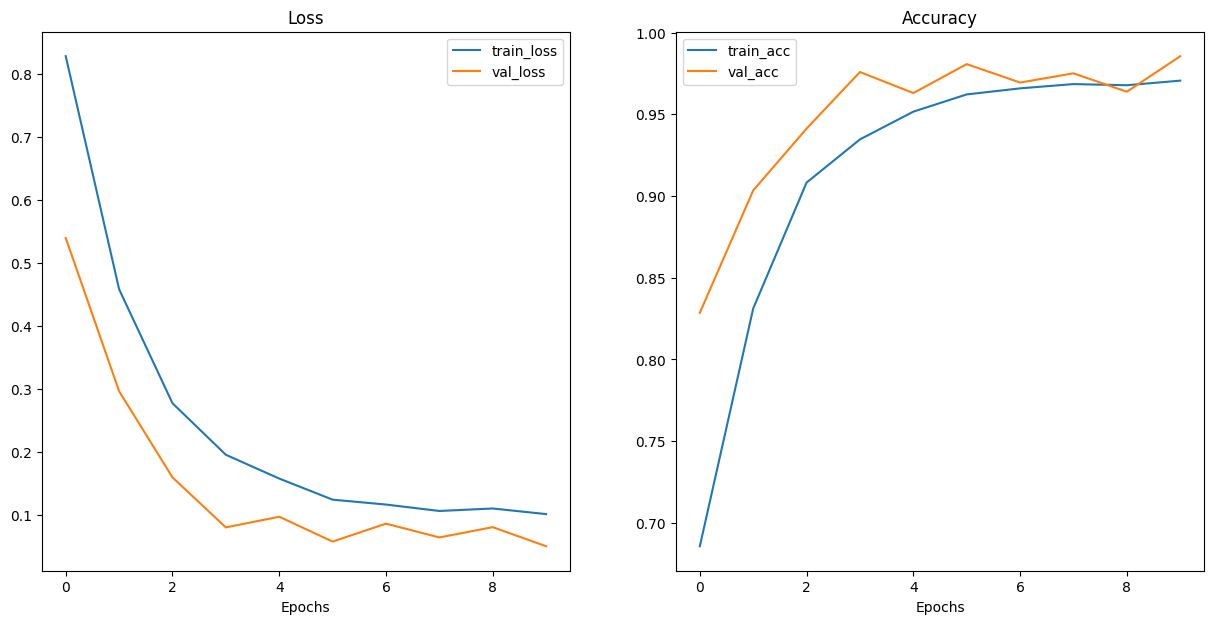

In [32]:
plot_loss_curves(model_3_results)

Test Accuracy: 98.32%


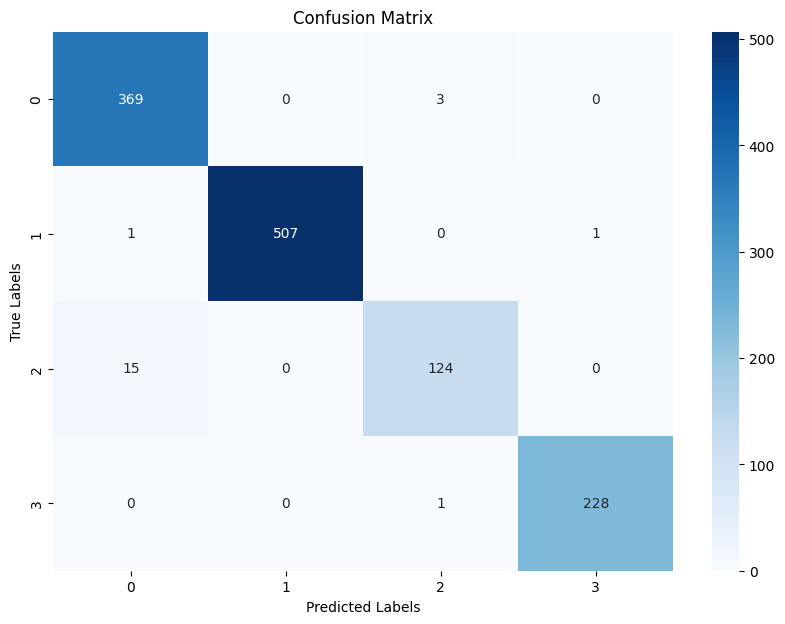

In [33]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns

all_preds = []
all_labels = []
correct = 0
total = 0

model_3.eval() 
with torch.inference_mode():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_3(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')


# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

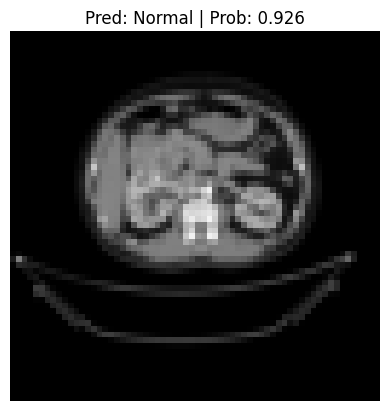

In [36]:
import torchvision
custom_image_path = data_path / "Tumor.jpg"
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
])
pred_and_plot_image(model=model_3,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)